In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import math
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

# Read the dataset into a Pandas DataFrame

df = pd.read_csv('/content/drive/MyDrive/CSI300Index(cny).csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'].str[:10])

df


,Date,Open,High,Low,Close,Volume
0,2021-03-11,5024.560059,5138.410156,5020.580078,5128.220215,189600
1,2021-03-12,5153.669922,5153.669922,5086.819824,5146.379883,201000
2,2021-03-13,NaN,NaN,NaN,NaN,0
3,2021-03-14,NaN,NaN,NaN,NaN,0
4,2021-03-15,5116.120117,5120.879883,4992.399902,5035.540039,204200
...,...,...,...,...,...,...
1108,2024-03-23,NaN,NaN,NaN,NaN,0
1109,2024-03-24,NaN,NaN,NaN,NaN,0
1110,2024-03-25,3536.709961,3564.959961,3525.760010,3525.760010,137000
1111,2024-03-26,3526.679932,3547.649902,3518.600098,3543.750000,126200


In [7]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Open' column is not NaN
df = df[df['Open'].notna()]

# Reset index
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
df



,Date,Open,High,Low,Close,Volume
0,2021-03-11,5024.560059,5138.410156,5020.580078,5128.220215,189600
1,2021-03-12,5153.669922,5153.669922,5086.819824,5146.379883,201000
2,2021-03-15,5116.120117,5120.879883,4992.399902,5035.540039,204200
3,2021-03-16,5054.410156,5084.310059,5009.950195,5079.359863,161400
4,2021-03-17,5062.770020,5123.549805,5020.129883,5100.859863,149200
...,...,...,...,...,...,...
735,2024-03-21,3593.070068,3601.110107,3575.030029,3581.090088,130700
736,2024-03-22,3571.270020,3575.719971,3522.840088,3545.000000,139200
737,2024-03-25,3536.709961,3564.959961,3525.760010,3525.760010,137000
738,2024-03-26,3526.679932,3547.649902,3518.600098,3543.750000,126200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    740 non-null    datetime64[ns]
 1   Open    740 non-null    float64       
 2   High    740 non-null    float64       
 3   Low     740 non-null    float64       
 4   Close   740 non-null    float64       
 5   Volume  740 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 34.8 KB


In [9]:
df.shape


(740, 6)

In [10]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of DowJones',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=plot_data, layout=layout)


iplot(plot)

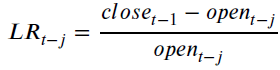

Where,
       


*   t is the orbservation at time 't'
*   𝑗 ∈ {1, 2, 3, 4, 5, 21, 63, 126, 252}
*   LR is the Lagged Returns



In [11]:
def calculate_lagged_returns(df, window_sizes):
    for window_size in window_sizes:

        lagged_returns = (df['Close'].shift(1) - df['Open'].shift(window_size)) / df['Open'].shift(window_size)
        lagged_returns_name = f'LR_{window_size}'
        df[lagged_returns_name] = lagged_returns
    return df


window_sizes = [1, 2, 3, 4, 5, 21, 63, 126, 252]

df_with_lagged_returns = calculate_lagged_returns(df, window_sizes)

df_with_lagged_returns


<ipython-input-11-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-1c7c221

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252
0,2021-03-11,5024.560059,5138.410156,5020.580078,5128.220215,189600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-12,5153.669922,5153.669922,5086.819824,5146.379883,201000,0.020631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-15,5116.120117,5120.879883,4992.399902,5035.540039,204200,-0.001415,0.024245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-16,5054.410156,5084.310059,5009.950195,5079.359863,161400,-0.015750,-0.022922,0.002185,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-17,5062.770020,5123.549805,5020.129883,5100.859863,149200,0.004936,-0.007185,-0.014419,0.010906,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2024-03-21,3593.070068,3601.110107,3575.030029,3581.090088,130700,0.004668,-0.002215,0.002326,0.008571,0.003805,0.057522,0.058452,-0.043299,-0.110491
736,2024-03-22,3571.270020,3575.719971,3522.840088,3545.000000,139200,-0.003334,0.003466,-0.003409,0.001127,0.007365,0.037892,0.063920,-0.042638,-0.112678
737,2024-03-25,3536.709961,3564.959961,3525.760010,3525.760010,137000,-0.007356,-0.013379,-0.006647,-0.013453,-0.008963,0.015369,0.064824,-0.058265,-0.111929
738,2024-03-26,3526.679932,3547.649902,3518.600098,3543.750000,126200,-0.003096,-0.012743,-0.018733,-0.012038,-0.018807,0.011539,0.060169,-0.062201,-0.110250


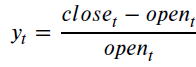

Where,
       


*   t is the orbservation at time 't'
*   y is the Target_variable



In [12]:
# Add the target variable column to the DataFrame

df_with_target_variable = df_with_lagged_returns.copy()
df_with_target_variable['Target_variable'] = (df_with_target_variable['Close'] - df_with_target_variable['Open']) / df_with_target_variable['Open']
df_with_target_variable


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
0,2021-03-11,5024.560059,5138.410156,5020.580078,5128.220215,189600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020631
1,2021-03-12,5153.669922,5153.669922,5086.819824,5146.379883,201000,0.020631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001415
2,2021-03-15,5116.120117,5120.879883,4992.399902,5035.540039,204200,-0.001415,0.024245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015750
3,2021-03-16,5054.410156,5084.310059,5009.950195,5079.359863,161400,-0.015750,-0.022922,0.002185,NaN,NaN,NaN,NaN,NaN,NaN,0.004936
4,2021-03-17,5062.770020,5123.549805,5020.129883,5100.859863,149200,0.004936,-0.007185,-0.014419,0.010906,NaN,NaN,NaN,NaN,NaN,0.007524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2024-03-21,3593.070068,3601.110107,3575.030029,3581.090088,130700,0.004668,-0.002215,0.002326,0.008571,0.003805,0.057522,0.058452,-0.043299,-0.110491,-0.003334
736,2024-03-22,3571.270020,3575.719971,3522.840088,3545.000000,139200,-0.003334,0.003466,-0.003409,0.001127,0.007365,0.037892,0.063920,-0.042638,-0.112678,-0.007356
737,2024-03-25,3536.709961,3564.959961,3525.760010,3525.760010,137000,-0.007356,-0.013379,-0.006647,-0.013453,-0.008963,0.015369,0.064824,-0.058265,-0.111929,-0.003096
738,2024-03-26,3526.679932,3547.649902,3518.600098,3543.750000,126200,-0.003096,-0.012743,-0.018733,-0.012038,-0.018807,0.011539,0.060169,-0.062201,-0.110250,0.004840


In [13]:
df = df_with_target_variable.dropna()
df

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
252,2022-03-24,4249.529785,4273.959961,4216.850098,4251.310059,108900,0.001618,0.005632,-0.000846,0.013761,0.009168,-0.066672,-0.148331,-0.139183,-0.148877,0.000419
253,2022-03-25,4249.069824,4254.839844,4173.930176,4174.569824,108800,0.000419,-0.004286,-0.000296,-0.006736,0.007785,-0.074206,-0.138534,-0.150888,-0.175091,-0.017533
254,2022-03-28,4128.839844,4174.120117,4091.300049,4148.470215,118400,-0.017533,-0.017640,-0.022260,-0.018342,-0.024665,-0.085453,-0.143943,-0.163384,-0.184036,0.004754
255,2022-03-29,4155.419922,4177.209961,4124.720215,4134.140137,100300,0.004754,-0.023676,-0.023781,-0.028373,-0.024479,-0.090993,-0.157599,-0.154038,-0.179238,-0.005121
256,2022-03-30,4162.169922,4254.100098,4160.740234,4254.100098,138300,-0.005121,0.001284,-0.027048,-0.027154,-0.031729,-0.100854,-0.160460,-0.150541,-0.183423,0.022087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2024-03-21,3593.070068,3601.110107,3575.030029,3581.090088,130700,0.004668,-0.002215,0.002326,0.008571,0.003805,0.057522,0.058452,-0.043299,-0.110491,-0.003334
736,2024-03-22,3571.270020,3575.719971,3522.840088,3545.000000,139200,-0.003334,0.003466,-0.003409,0.001127,0.007365,0.037892,0.063920,-0.042638,-0.112678,-0.007356
737,2024-03-25,3536.709961,3564.959961,3525.760010,3525.760010,137000,-0.007356,-0.013379,-0.006647,-0.013453,-0.008963,0.015369,0.064824,-0.058265,-0.111929,-0.003096
738,2024-03-26,3526.679932,3547.649902,3518.600098,3543.750000,126200,-0.003096,-0.012743,-0.018733,-0.012038,-0.018807,0.011539,0.060169,-0.062201,-0.110250,0.004840


In [14]:
# Calculate the lengths for train, validation, and test sets
total_length = len(df)
train_length = int(total_length * 0.7)
validation_length = int(total_length * 0.15)

# Split the data into training, validation, and test sets
train_set = df.iloc[:train_length]
validation_set = df.iloc[train_length:train_length+validation_length]
test_set = df.iloc[train_length+validation_length:]

x_train = train_set.iloc[:, 6:-1].values
y_train = train_set.iloc[:, -1].values

x_valid = validation_set.iloc[:, 6:-1].values
y_valid = validation_set.iloc[:, -1].values

x_test = test_set.iloc[:, 6:-1].values
y_test = test_set.iloc[:, -1].values



In [15]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_valid: ",x_valid.shape)
print("y_valid: ",y_valid.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)


x_train:  (341, 9)
y_train:  (341,)
x_valid:  (73, 9)
y_valid:  (73,)
x_test:  (74, 9)
y_test:  (74,)


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [17]:
best_svr = grid_search.best_estimator_

In [18]:
# Print the best hyperparameters found from grid search

print("Best hyperparameters found from grid search:")
print(grid_search.best_params_)

Best hyperparameters found from grid search:
{'C': 10, 'epsilon': 0.0001, 'gamma': 0.001}


In [19]:
best_model_path = "best_svr_model.pkl"
joblib.dump((best_svr, grid_search.best_params_), best_model_path)

drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/"

!cp best_svr_model.pkl "{drive_path}"

print(f"Model saved in Google Drive: {drive_path}best_svr_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved in Google Drive: /content/drive/MyDrive/best_svr_model.pkl


In [20]:
# Load best model and its hyperparameters
drive_path = "/content/drive/MyDrive/"

loaded_model_path = drive_path + "best_svr_model.pkl"
best_svr, best_hyperparameters_svr = joblib.load(loaded_model_path)
print("model loaded and stored in variable 'best_svr'")

print("Loaded hyperparameters:")
print(best_hyperparameters_svr)



model loaded and stored in variable 'best_svr'
Loaded hyperparameters:
{'C': 10, 'epsilon': 0.0001, 'gamma': 0.001}


In [21]:
# Make predictions
y_train_pred = best_svr.predict(x_train)
y_valid_pred = best_svr.predict(x_valid)
y_test_pred = best_svr.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [22]:
print("Train RMSE (SVR): ",train_rmse)
print("Validation RMSE (SVR): ",valid_rmse)
print("Test RMSE (SVR): ",test_rmse)


Train RMSE (SVR):  0.00954169463917282
Validation RMSE (SVR):  0.00864477171620495
Test RMSE (SVR):  0.010179619129749828


In [23]:
# Add the predicted target variable to the validation set with the new column name

validation_set['Target_prediction'] = y_valid_pred
validation_set


<ipython-input-23-59e6355016a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction
593,2023-08-17,3801.199951,3836.149902,3782.500000,3831.100098,98400,-0.003263,-0.010377,-0.005874,-0.040133,-0.036471,-0.007834,-0.037117,-0.080198,-0.066295,0.007866,0.000255
594,2023-08-18,3832.459961,3844.199951,3784.000000,3784.000000,95600,0.007866,0.000070,-0.007068,-0.002549,-0.036923,-0.006913,-0.029172,-0.076142,-0.067775,-0.012645,0.000076
595,2023-08-21,3773.229980,3782.110107,3729.560059,3729.560059,98700,-0.012645,-0.004525,-0.012225,-0.019275,-0.014812,-0.008640,-0.039838,-0.082758,-0.086456,-0.011574,0.000148
596,2023-08-22,3748.070068,3770.060059,3704.679932,3758.229980,120300,-0.011574,-0.026850,-0.018847,-0.026436,-0.033385,-0.019401,-0.060145,-0.087284,-0.099938,0.002711,0.000470
597,2023-08-23,3751.770020,3756.169922,3695.030029,3696.629883,97100,0.002711,-0.003975,-0.019369,-0.011304,-0.018952,-0.028037,-0.037284,-0.069736,-0.094230,-0.014697,-0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2023-11-29,3518.879883,3519.199951,3482.239990,3488.310059,98800,0.002239,-0.004504,-0.011832,-0.006472,-0.014266,-0.017634,-0.052005,-0.086433,-0.088658,-0.008687,0.000217
662,2023-11-30,3485.520020,3505.129883,3481.449951,3496.199951,101400,-0.008687,-0.006366,-0.013052,-0.020316,-0.015002,-0.032573,-0.058107,-0.093573,-0.087133,0.003064,0.000299
663,2023-12-01,3494.219971,3494.219971,3452.169922,3482.879883,108500,0.003064,-0.006445,-0.004119,-0.010819,-0.018101,-0.023427,-0.106186,-0.094737,-0.085679,-0.003245,0.000640
664,2023-12-04,3481.040039,3488.129883,3459.610107,3460.139893,97200,-0.003245,-0.000757,-0.010231,-0.007913,-0.014588,-0.021259,-0.069508,-0.090107,-0.076068,-0.006004,0.000287


In [24]:
# Add a new column 'Predicted_close' to validation_set

validation_set['Predicted_close'] = (validation_set['Target_prediction'] * validation_set['Open']) + validation_set['Open']
validation_set


<ipython-input-24-e78b35780010>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
593,2023-08-17,3801.199951,3836.149902,3782.500000,3831.100098,98400,-0.003263,-0.010377,-0.005874,-0.040133,-0.036471,-0.007834,-0.037117,-0.080198,-0.066295,0.007866,0.000255,3802.170041
594,2023-08-18,3832.459961,3844.199951,3784.000000,3784.000000,95600,0.007866,0.000070,-0.007068,-0.002549,-0.036923,-0.006913,-0.029172,-0.076142,-0.067775,-0.012645,0.000076,3832.751717
595,2023-08-21,3773.229980,3782.110107,3729.560059,3729.560059,98700,-0.012645,-0.004525,-0.012225,-0.019275,-0.014812,-0.008640,-0.039838,-0.082758,-0.086456,-0.011574,0.000148,3773.789041
596,2023-08-22,3748.070068,3770.060059,3704.679932,3758.229980,120300,-0.011574,-0.026850,-0.018847,-0.026436,-0.033385,-0.019401,-0.060145,-0.087284,-0.099938,0.002711,0.000470,3749.831082
597,2023-08-23,3751.770020,3756.169922,3695.030029,3696.629883,97100,0.002711,-0.003975,-0.019369,-0.011304,-0.018952,-0.028037,-0.037284,-0.069736,-0.094230,-0.014697,-0.000019,3751.699161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2023-11-29,3518.879883,3519.199951,3482.239990,3488.310059,98800,0.002239,-0.004504,-0.011832,-0.006472,-0.014266,-0.017634,-0.052005,-0.086433,-0.088658,-0.008687,0.000217,3519.642583
662,2023-11-30,3485.520020,3505.129883,3481.449951,3496.199951,101400,-0.008687,-0.006366,-0.013052,-0.020316,-0.015002,-0.032573,-0.058107,-0.093573,-0.087133,0.003064,0.000299,3486.560682
663,2023-12-01,3494.219971,3494.219971,3452.169922,3482.879883,108500,0.003064,-0.006445,-0.004119,-0.010819,-0.018101,-0.023427,-0.106186,-0.094737,-0.085679,-0.003245,0.000640,3496.454644
664,2023-12-04,3481.040039,3488.129883,3459.610107,3460.139893,97200,-0.003245,-0.000757,-0.010231,-0.007913,-0.014588,-0.021259,-0.069508,-0.090107,-0.076068,-0.006004,0.000287,3482.039934


In [25]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=8a774fd514be0f9b48246b776c90470c446ecad922a60d82295f272badf8dcf5
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [26]:
import eli5
from eli5.sklearn import PermutationImportance



perm = PermutationImportance(best_svr, random_state=1)
perm.fit(x_valid, y_valid)
eli5.show_weights(perm, feature_names=['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'])


Weight,Feature
0.0063 ± 0.0088,LR_126
0.0033 ± 0.0055,LR_63
0.0001 ± 0.0007,LR_3
-0.0002 ± 0.0010,LR_2
-0.0004 ± 0.0015,LR_252
-0.0007 ± 0.0063,LR_5
-0.0008 ± 0.0006,LR_1
-0.0009 ± 0.0024,LR_4
-0.0026 ± 0.0033,LR_21


In [27]:
weights = perm.feature_importances_
feature_names = ['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252']

feature_weights = list(zip(feature_names, weights))

sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

sorted_feature_names = [feature[0] for feature in sorted_features]

print("Ranked Features based on Permutation Importance:")
print(sorted_feature_names)


Ranked Features based on Permutation Importance:
['LR_126', 'LR_63', 'LR_3', 'LR_2', 'LR_252', 'LR_5', 'LR_1', 'LR_4', 'LR_21']


In [28]:
validation_set_pi=validation_set.copy()
features_to_drop = ['Target_prediction','Predicted_close']
validation_set_pi.drop(features_to_drop, axis=1, inplace=True)

validation_set_pi


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
593,2023-08-17,3801.199951,3836.149902,3782.500000,3831.100098,98400,-0.003263,-0.010377,-0.005874,-0.040133,-0.036471,-0.007834,-0.037117,-0.080198,-0.066295,0.007866
594,2023-08-18,3832.459961,3844.199951,3784.000000,3784.000000,95600,0.007866,0.000070,-0.007068,-0.002549,-0.036923,-0.006913,-0.029172,-0.076142,-0.067775,-0.012645
595,2023-08-21,3773.229980,3782.110107,3729.560059,3729.560059,98700,-0.012645,-0.004525,-0.012225,-0.019275,-0.014812,-0.008640,-0.039838,-0.082758,-0.086456,-0.011574
596,2023-08-22,3748.070068,3770.060059,3704.679932,3758.229980,120300,-0.011574,-0.026850,-0.018847,-0.026436,-0.033385,-0.019401,-0.060145,-0.087284,-0.099938,0.002711
597,2023-08-23,3751.770020,3756.169922,3695.030029,3696.629883,97100,0.002711,-0.003975,-0.019369,-0.011304,-0.018952,-0.028037,-0.037284,-0.069736,-0.094230,-0.014697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2023-11-29,3518.879883,3519.199951,3482.239990,3488.310059,98800,0.002239,-0.004504,-0.011832,-0.006472,-0.014266,-0.017634,-0.052005,-0.086433,-0.088658,-0.008687
662,2023-11-30,3485.520020,3505.129883,3481.449951,3496.199951,101400,-0.008687,-0.006366,-0.013052,-0.020316,-0.015002,-0.032573,-0.058107,-0.093573,-0.087133,0.003064
663,2023-12-01,3494.219971,3494.219971,3452.169922,3482.879883,108500,0.003064,-0.006445,-0.004119,-0.010819,-0.018101,-0.023427,-0.106186,-0.094737,-0.085679,-0.003245
664,2023-12-04,3481.040039,3488.129883,3459.610107,3460.139893,97200,-0.003245,-0.000757,-0.010231,-0.007913,-0.014588,-0.021259,-0.069508,-0.090107,-0.076068,-0.006004


In [29]:
x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
y_valid_pi = validation_set_pi.iloc[:, -1].values

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_valid_pi, y_valid_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [31]:
# Get the best model from grid search
best_svr_pi = grid_search.best_estimator_


In [32]:
y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

print("Validation RMSE:", valid_rmse_pi)


Validation RMSE: 0.008372169677141427


In [33]:
loss_difference=valid_rmse-valid_rmse_pi
loss_difference

0.0002726020390635235

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

validation_set_pi = validation_set.copy()
validation_set_pi.drop(['Target_prediction', 'Predicted_close'], axis=1, inplace=True)


rmse_dict = {}
features_dropped = []

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

svr = SVR(kernel='rbf')

for feature in sorted_feature_names[::-1]:

    validation_set_pi.drop([feature], axis=1, inplace=True)

    x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
    y_valid_pi = validation_set_pi.iloc[:, -1].values

    if x_valid_pi.shape[1] > 0:
        grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(x_valid_pi, y_valid_pi)

        best_svr_pi = grid_search.best_estimator_

        y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

        valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

        feature_names = validation_set_pi.columns[6:-1].tolist()

        rmse_dict[tuple(feature_names)] = valid_rmse_pi

        features_dropped.append(feature)

    else:
        print("No features left to drop. Exiting loop.")
        break

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
No features left to drop. Exiting loop.


In [35]:
print(rmse_dict)

{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.008370722895838397, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.008371003556326327, ('LR_2', 'LR_3', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.008372311856388424, ('LR_2', 'LR_3', 'LR_63', 'LR_126', 'LR_252'): 0.00837231562692379, ('LR_2', 'LR_3', 'LR_63', 'LR_126'): 0.008369772483386844, ('LR_3', 'LR_63', 'LR_126'): 0.008352786633117712, ('LR_63', 'LR_126'): 0.008375040220874649, ('LR_126',): 0.00836612884782015}


In [36]:
# Convert rmse_dict keys to a list of tuples
feature_combinations = list(rmse_dict.keys())

# Initialize a new dictionary to store the loss differences
rmse_loss_dict = {}

# Iterate over the indices of feature_combinations
for i in range(len(feature_combinations)):
    # Calculate the loss difference
    loss_difference = valid_rmse - rmse_dict[feature_combinations[i]]

    # Store the feature combination and its loss difference in rmse_loss_dict
    rmse_loss_dict[feature_combinations[i]] = loss_difference

print(rmse_loss_dict)


{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.00027404882036655316, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.0002737681598786231, ('LR_2', 'LR_3', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.0002724598598165262, ('LR_2', 'LR_3', 'LR_63', 'LR_126', 'LR_252'): 0.00027245608928115964, ('LR_2', 'LR_3', 'LR_63', 'LR_126'): 0.00027499923281810654, ('LR_3', 'LR_63', 'LR_126'): 0.0002919850830872383, ('LR_63', 'LR_126'): 0.00026973149533030157, ('LR_126',): 0.00027864286838480065}


In [37]:
# Find the feature combination with the maximum loss difference
max_loss_feature_combination = max(rmse_loss_dict, key=rmse_loss_dict.get)
max_loss_difference = rmse_loss_dict[max_loss_feature_combination]

# Print the results
print("Feature Combination with Maximum Loss Difference:", max_loss_feature_combination)
print("Maximum Loss Difference:", max_loss_difference)


Feature Combination with Maximum Loss Difference: ('LR_3', 'LR_63', 'LR_126')
Maximum Loss Difference: 0.0002919850830872383


In [38]:
import plotly.graph_objects as go

# Sort DataFrame by 'Date'
validation_set.sort_values(by='Date', inplace=True)

# Create a Plotly figure
fig = go.Figure()

# Add actual close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

# Add predicted close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

# Update layout
fig.update_layout(title='Stock Market Performance (Validation Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',  # Show hover information for both traces
                  template='plotly_white')

# Show the plot
fig.show()


<ipython-input-38-70a4f92b4860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


test_set_pi = test_set.copy()
selected_features = list(max_loss_feature_combination) + ['Target_variable']


test_set_pi = test_set[selected_features]

x_test_pi = test_set_pi.iloc[:, 0:-1].values
y_test_pi = test_set_pi.iloc[:, -1].values


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_test_pi, y_test_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [40]:
best_svr_pi_test = grid_search.best_estimator_

y_test_pred_pi = best_svr_pi_test.predict(x_test_pi)

test_rmse_pi = np.sqrt(mean_squared_error(y_test_pi, y_test_pred_pi))

print("Test RMSE:", test_rmse_pi)



Test RMSE: 0.010068157927327704


In [41]:
test_set['Target_prediction'] = y_test_pred

test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']

test_set


<ipython-input-41-1e80d68ee31b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-1e80d68ee31b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
666,2023-12-06,3387.879883,3420.280029,3382.949951,3399.600098,105800,-0.016182,-0.024929,-0.028607,-0.026183,-0.035415,-0.063337,-0.103691,-0.104084,-0.097324,0.003459,0.000731,3390.357473
667,2023-12-07,3394.310059,3404.409912,3369.770020,3391.280029,97700,0.003459,-0.014634,-0.023395,-0.027079,-0.024651,-0.058449,-0.100375,-0.110430,-0.103372,-0.000893,0.000812,3397.066267
668,2023-12-08,3391.860107,3409.379883,3383.449951,3399.459961,129500,-0.000893,0.001004,-0.017046,-0.025785,-0.029460,-0.058791,-0.110598,-0.121557,-0.095967,0.002241,0.001004,3395.264725
669,2023-12-11,3378.050049,3426.610107,3346.889893,3419.449951,139600,0.002241,0.001517,0.003418,-0.014675,-0.023436,-0.054674,-0.114627,-0.114830,-0.081699,0.012256,0.000843,3380.897213
670,2023-12-12,3410.000000,3427.550049,3406.100098,3426.800049,105600,0.012256,0.008134,0.007406,0.009319,-0.008881,-0.048543,-0.102059,-0.103796,-0.092158,0.004927,0.000564,3411.921592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2024-03-21,3593.070068,3601.110107,3575.030029,3581.090088,130700,0.004668,-0.002215,0.002326,0.008571,0.003805,0.057522,0.058452,-0.043299,-0.110491,-0.003334,-0.000680,3590.626323
736,2024-03-22,3571.270020,3575.719971,3522.840088,3545.000000,139200,-0.003334,0.003466,-0.003409,0.001127,0.007365,0.037892,0.063920,-0.042638,-0.112678,-0.007356,-0.000794,3568.434157
737,2024-03-25,3536.709961,3564.959961,3525.760010,3525.760010,137000,-0.007356,-0.013379,-0.006647,-0.013453,-0.008963,0.015369,0.064824,-0.058265,-0.111929,-0.003096,-0.000577,3534.667695
738,2024-03-26,3526.679932,3547.649902,3518.600098,3543.750000,126200,-0.003096,-0.012743,-0.018733,-0.012038,-0.018807,0.011539,0.060169,-0.062201,-0.110250,0.004840,-0.000467,3525.031568


In [42]:
import plotly.graph_objects as go

test_set.sort_values(by='Date', inplace=True)

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

fig.update_layout(title='Stock Market Performance (Test Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


<ipython-input-42-8169664d4a58>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
test_set['Target_prediction'] = y_test_pred
test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']
test_set

<ipython-input-43-dc11733f5df5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-dc11733f5df5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
666,2023-12-06,3387.879883,3420.280029,3382.949951,3399.600098,105800,-0.016182,-0.024929,-0.028607,-0.026183,-0.035415,-0.063337,-0.103691,-0.104084,-0.097324,0.003459,0.000731,3390.357473
667,2023-12-07,3394.310059,3404.409912,3369.770020,3391.280029,97700,0.003459,-0.014634,-0.023395,-0.027079,-0.024651,-0.058449,-0.100375,-0.110430,-0.103372,-0.000893,0.000812,3397.066267
668,2023-12-08,3391.860107,3409.379883,3383.449951,3399.459961,129500,-0.000893,0.001004,-0.017046,-0.025785,-0.029460,-0.058791,-0.110598,-0.121557,-0.095967,0.002241,0.001004,3395.264725
669,2023-12-11,3378.050049,3426.610107,3346.889893,3419.449951,139600,0.002241,0.001517,0.003418,-0.014675,-0.023436,-0.054674,-0.114627,-0.114830,-0.081699,0.012256,0.000843,3380.897213
670,2023-12-12,3410.000000,3427.550049,3406.100098,3426.800049,105600,0.012256,0.008134,0.007406,0.009319,-0.008881,-0.048543,-0.102059,-0.103796,-0.092158,0.004927,0.000564,3411.921592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2024-03-21,3593.070068,3601.110107,3575.030029,3581.090088,130700,0.004668,-0.002215,0.002326,0.008571,0.003805,0.057522,0.058452,-0.043299,-0.110491,-0.003334,-0.000680,3590.626323
736,2024-03-22,3571.270020,3575.719971,3522.840088,3545.000000,139200,-0.003334,0.003466,-0.003409,0.001127,0.007365,0.037892,0.063920,-0.042638,-0.112678,-0.007356,-0.000794,3568.434157
737,2024-03-25,3536.709961,3564.959961,3525.760010,3525.760010,137000,-0.007356,-0.013379,-0.006647,-0.013453,-0.008963,0.015369,0.064824,-0.058265,-0.111929,-0.003096,-0.000577,3534.667695
738,2024-03-26,3526.679932,3547.649902,3518.600098,3543.750000,126200,-0.003096,-0.012743,-0.018733,-0.012038,-0.018807,0.011539,0.060169,-0.062201,-0.110250,0.004840,-0.000467,3525.031568


In [44]:
import pandas as pd

combined_df = pd.concat([train_set, validation_set, test_set], axis=0)

combined_df.reset_index(drop=True, inplace=True)

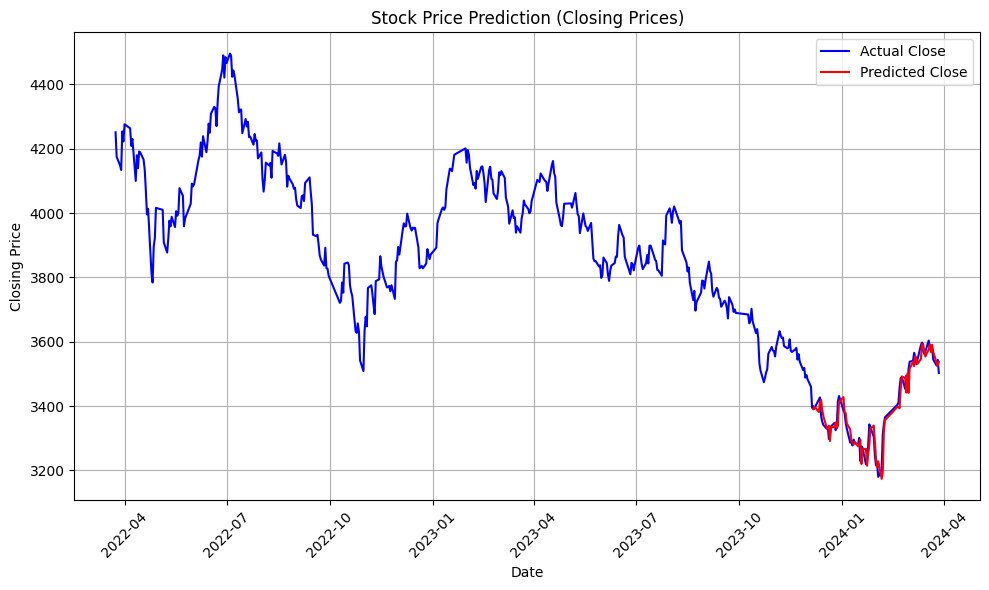

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'],combined_df['Close'] , label='Actual Close', color='blue')
plt.plot(test_set['Date'],test_set['Predicted_close'] , label='Predicted Close', color='red')

plt.title('Stock Price Prediction (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Datasets to carry out the rest of the study (15-20 Datasets)

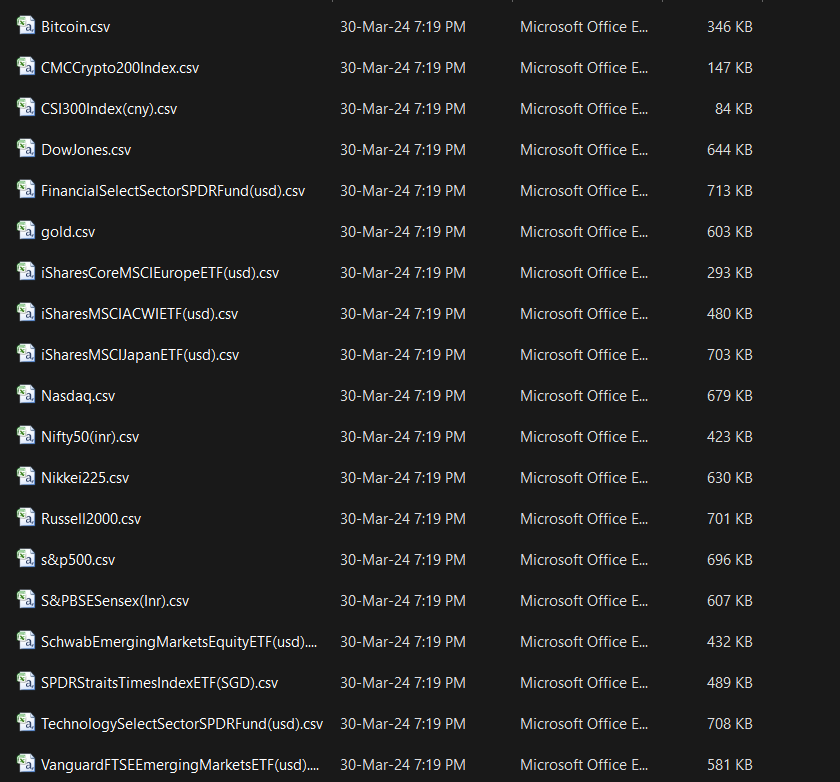

## Other Machine Learning models to experimentation   (4 Models)


*   Gradient Boosting Decision Tree
*   XGBoost
*   Random Forest





In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid for GridSearchCV
param_grid_gbdt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GBDT model
gbdt = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbdt.fit(x_train, y_train)

# Get the best model from grid search
best_gbdt = grid_search_gbdt.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for GBDT:")
print(grid_search_gbdt.best_params_)

# Make predictions
y_train_pred_gbdt = best_gbdt.predict(x_train)
y_valid_pred_gbdt = best_gbdt.predict(x_valid)
y_test_pred_gbdt = best_gbdt.predict(x_test)

# Evaluate the model
train_rmse_gbdt = np.sqrt(mean_squared_error(y_train, y_train_pred_gbdt))
valid_rmse_gbdt = np.sqrt(mean_squared_error(y_valid, y_valid_pred_gbdt))
test_rmse_gbdt = np.sqrt(mean_squared_error(y_test, y_test_pred_gbdt))

print("Train RMSE (GBDT):", train_rmse_gbdt)
print("Validation RMSE (GBDT):", valid_rmse_gbdt)
print("Test RMSE (GBDT):", test_rmse_gbdt)

# Plotting

# Visualization for GBDT predictions
# Use the same approach as you did for SVR to visualize GBDT predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for GBDT:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (GBDT): 0.009074808360180221
Validation RMSE (GBDT): 0.008689508364725974
Test RMSE (GBDT): 0.010394815826950798


In [47]:
import xgboost as xgb

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create XGBoost model
xgboost = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for XGBoost:")
print(grid_search_xgb.best_params_)

# Make predictions
y_train_pred_xgb = best_xgb.predict(x_train)
y_valid_pred_xgb = best_xgb.predict(x_valid)
y_test_pred_xgb = best_xgb.predict(x_test)

# Evaluate the model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
valid_rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_valid_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("Train RMSE (XGBoost):", train_rmse_xgb)
print("Validation RMSE (XGBoost):", valid_rmse_xgb)
print("Test RMSE (XGBoost):", test_rmse_xgb)

# Plotting

# Visualization for XGBoost predictions
# Use the same approach as you did for SVR to visualize XGBoost predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for XGBoost:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (XGBoost): 0.009103728170171807
Validation RMSE (XGBoost): 0.008710448438408973
Test RMSE (XGBoost): 0.010376935129301794


In [48]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Create Random Forest model
random_forest = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Make predictions
y_train_pred_rf = best_rf.predict(x_train)
y_valid_pred_rf = best_rf.predict(x_valid)
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
valid_rmse_rf = np.sqrt(mean_squared_error(y_valid, y_valid_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Train RMSE (Random Forest):", train_rmse_rf)
print("Validation RMSE (Random Forest):", valid_rmse_rf)
print("Test RMSE (Random Forest):", test_rmse_rf)

# Plotting

# Visualization for Random Forest predictions
# Use the same approach as you did for SVR to visualize Random Forest predictions.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
Train RMSE (Random Forest): 0.005577441739362867
Validation RMSE (Random Forest): 0.008580223608941952
Test RMSE (Random Forest): 0.009982866832373167
